# Experimenting with k-means and the EM algorithm (Gaussian mixture model) for clustering high and low network traffic patterns

In [14]:
%matplotlib inline

import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import cluster, mixture
from scipy import stats

plt.style.use('ggplot')

Simulate network usage data, with higher traffic during work hours and lower traffic elsewhere

In [15]:
# we will simulate hourly data over 2 weeks
hours = range(1, 25)  # 1-24
days = range(1, 8)  # 1-7
weeks = range(1, 2)  # 1-2
total_hours = range(1, (len(hours) * len(days) * len(weeks)) + 1)

usage = []
for week in weeks:
    for day in days:
        for hour in hours:
            if 8 < hour < 16:
                # get a large random number from a normal distribution
                # during work hours
                usage_this_hour = np.random.normal(loc=800, scale=200)
            else:
                # get a small random number from an exponential distrbution
                usage_this_hour = np.random.exponential(scale=50)
            usage.append(usage_this_hour)
            
usage = np.array(usage)
total_hours = np.array(total_hours)

Plot the data

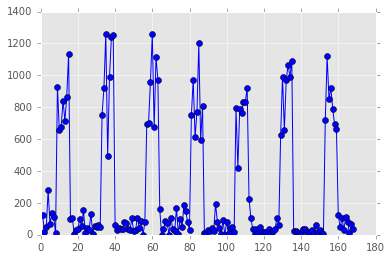

In [16]:
plt.plot(total_hours, usage, 'b-o')

(array([ 82.,  27.,   7.,   2.,   1.,   0.,   1.,   1.,   0.,   3.,   7.,
          5.,   6.,   5.,   4.,   7.,   1.,   4.,   0.,   5.]),
 array([  5.00032217e-01,   6.35942951e+01,   1.26688558e+02,
          1.89782821e+02,   2.52877084e+02,   3.15971347e+02,
          3.79065609e+02,   4.42159872e+02,   5.05254135e+02,
          5.68348398e+02,   6.31442661e+02,   6.94536924e+02,
          7.57631187e+02,   8.20725450e+02,   8.83819713e+02,
          9.46913975e+02,   1.01000824e+03,   1.07310250e+03,
          1.13619676e+03,   1.19929103e+03,   1.26238529e+03]),
 <a list of 20 Patch objects>)

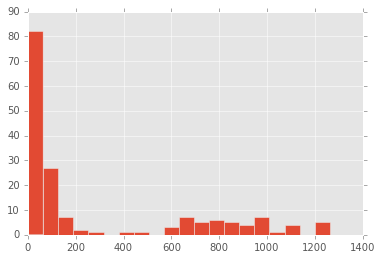

In [17]:
plt.hist(usage, bins=20)

## K-means approach

In [18]:
usage_mat = []
for h, u in zip(total_hours, usage):
    usage_mat.append([h, u])
usage_mat = np.array(usage_mat)

In [19]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(usage_mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [20]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [21]:
k_means.cluster_centers_

array([[  84.88333333,   58.06146305],
       [  83.54166667,  872.74996762]])

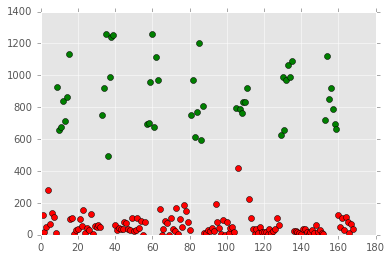

In [22]:
high_usage = usage[k_means.labels_ == 1]
high_hours = total_hours[k_means.labels_ == 1]
low_usage = usage[k_means.labels_ == 0]
low_hours = total_hours[k_means.labels_ == 0]
plt.plot(high_hours, high_usage, 'go')
plt.plot(low_hours, low_usage, 'ro')

Linear regression through the high traffic points

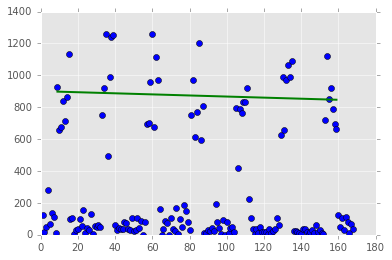

In [23]:
slope, intercept = stats.linregress(high_hours, high_usage)[:2]

plt.plot(total_hours, usage, 'bo')
plt.plot(high_hours, intercept + slope*high_hours, 'g-', linewidth=2)

Compare a mean through all the points to a mean through only the high traffic cluster

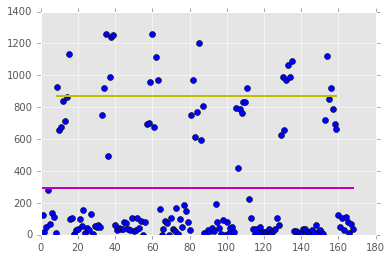

In [24]:
upper_avg = np.repeat(a=np.mean(high_usage), repeats=len(high_usage))
total_avg = np.repeat(a=np.mean(usage), repeats=len(usage))
plt.plot(total_hours, usage, 'bo')
plt.plot(total_hours, total_avg, 'm-', linewidth=2)
plt.plot(high_hours, upper_avg, 'y-', linewidth=2)

## Gaussian mixture model approach

In [32]:
g = mixture.GMM(n_components=2)
g.fit(usage.reshape(len(usage), 1))

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [33]:
g.weights_

array([ 0.30829567,  0.69170433])

In [34]:
g.means_

array([[ 829.33222015],
       [  50.81661823]])

In [36]:
predictions = g.predict(usage.reshape(len(usage), 1))
g.predict(usage.reshape(len(usage), 1))

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

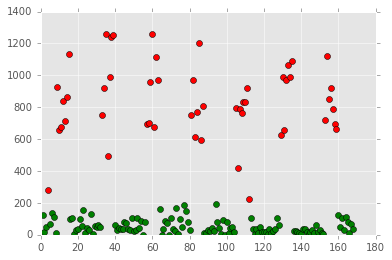

In [37]:
high_usage = usage[predictions == 1]
high_hours = total_hours[predictions == 1]
low_usage = usage[predictions == 0]
low_hours = total_hours[predictions == 0]
plt.plot(high_hours, high_usage, 'go')
plt.plot(low_hours, low_usage, 'ro')